In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input

# 指定亂數種子
seed = 7
np.random.seed(seed)

# 載入資料集
(x_train, _), (x_test, _) = mnist.load_data()

# 轉換成 28*28 = 784 的向量
x_train_new = x_train.reshape(x_train.shape[0], 28*28).astype('float32')
x_test_new = x_test.reshape(x_test.shape[0], 28*28).astype('float32')

# 因為是固定範圍, 所以執行正規化, 從 0-255 至 0-1
x_train_norm = x_train_new / 255
x_test_norm = x_test_new / 255

# 定義 Autoencoder 模型
input_img = Input(shape=(784,), name='Input')
x = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(x)
x = Dense(128, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(x)
autoencoder = Model(input_img, decoded, name='Auto-encoder')
autoencoder.summary()  # 顯示模型摘要資訊

# 定義 encoder 模型
encoder = Model(input_img, encoded, name='Encoder')
encoder.summary()    # 顯示模型摘要資訊

# 定義 decoder 模型
decoder_input = Input(shape=(64,))
decoder_layer = autoencoder.layers[-2](decoder_input)
decoder_layer = autoencoder.layers[-1](decoder_layer)
decoder = Model(decoder_input, decoder_layer, name='Decoder')
decoder.summary()    # 顯示模型摘要資訊


11490434/11490434 [==============================] - 2s 0us/step
Model: "Auto-encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 784)               101136    
                                                                 
Total params: 218192 (852.31 KB)
Trainable params: 218192 (852.31 KB)
Non-trainable params: 0 (0.00 Byte)
_______________

Epoch 1/10
235/235 - 7s - loss: 0.2208 - accuracy: 0.0106 - val_loss: 0.1405 - val_accuracy: 0.0107 - 7s/epoch - 32ms/step
Epoch 2/10
235/235 - 2s - loss: 0.1253 - accuracy: 0.0099 - val_loss: 0.1117 - val_accuracy: 0.0103 - 2s/epoch - 7ms/step
Epoch 3/10
235/235 - 2s - loss: 0.1074 - accuracy: 0.0125 - val_loss: 0.1011 - val_accuracy: 0.0131 - 2s/epoch - 8ms/step
Epoch 4/10
235/235 - 2s - loss: 0.0995 - accuracy: 0.0126 - val_loss: 0.0954 - val_accuracy: 0.0148 - 2s/epoch - 9ms/step
Epoch 5/10
235/235 - 2s - loss: 0.0944 - accuracy: 0.0129 - val_loss: 0.0910 - val_accuracy: 0.0127 - 2s/epoch - 9ms/step
Epoch 6/10
235/235 - 2s - loss: 0.0906 - accuracy: 0.0134 - val_loss: 0.0880 - val_accuracy: 0.0122 - 2s/epoch - 8ms/step
Epoch 7/10
235/235 - 1s - loss: 0.0880 - accuracy: 0.0141 - val_loss: 0.0859 - val_accuracy: 0.0134 - 1s/epoch - 4ms/step
Epoch 8/10
235/235 - 1s - loss: 0.0861 - accuracy: 0.0138 - val_loss: 0.0845 - val_accuracy: 0.0135 - 1s/epoch - 4ms/step
Epoch 9/10
235/235 - 1s

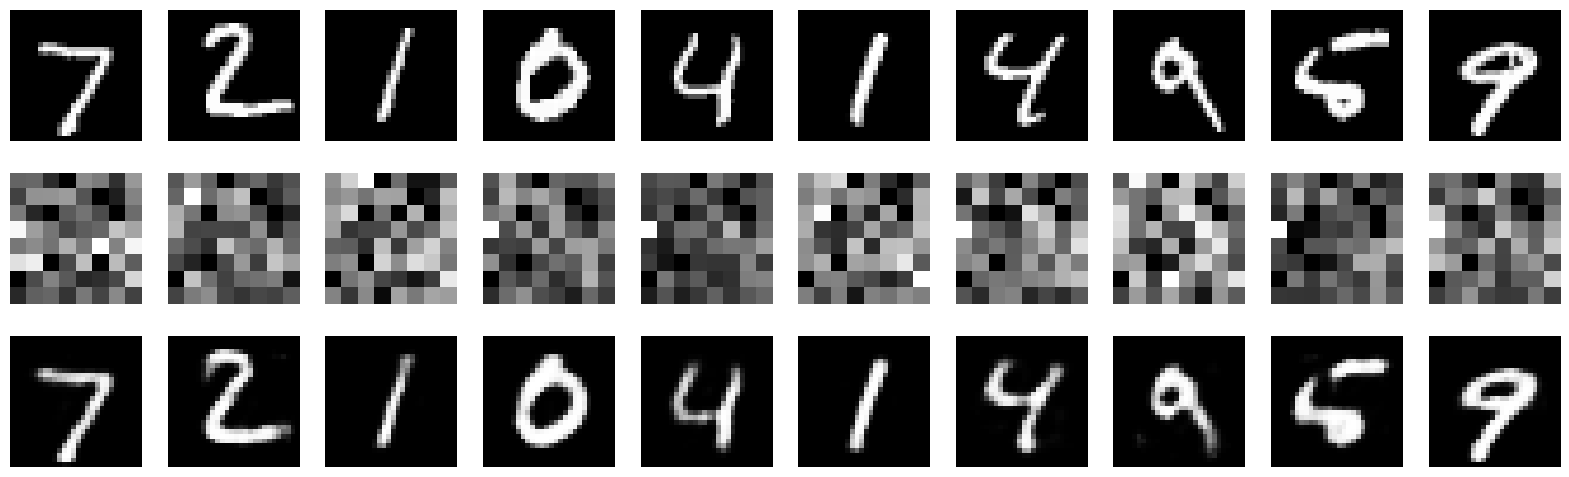

In [2]:
# 編譯模型
autoencoder.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 訓練模型
autoencoder.fit(x_train_norm, x_train_norm, validation_data=(x_test_norm, x_test_norm), epochs=10, batch_size=256, shuffle=True, verbose=2)

# 壓縮圖片
encoded_imgs = encoder.predict(x_test_norm)

# 解壓縮圖片
decoded_imgs = decoder.predict(encoded_imgs)

# 顯示原始, 壓縮和還原圖片
import matplotlib.pyplot as plt

n = 10  # 顯示幾個數字
plt.figure(figsize=(20, 6))
for i in range(n):
    # 原始圖片
    ax = plt.subplot(3, n, i + 1)
    ax.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
    # 壓縮圖片
    ax = plt.subplot(3, n, i + 1 + n)
    ax.imshow(encoded_imgs[i].reshape(8, 8), cmap='gray')
    ax.axis('off')
    # 還原圖片
    ax = plt.subplot(3, n, i + 1 + 2*n)
    ax.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.axis('off')

plt.show()

In [3]:
encoded_imgs[i].shape

(64,)

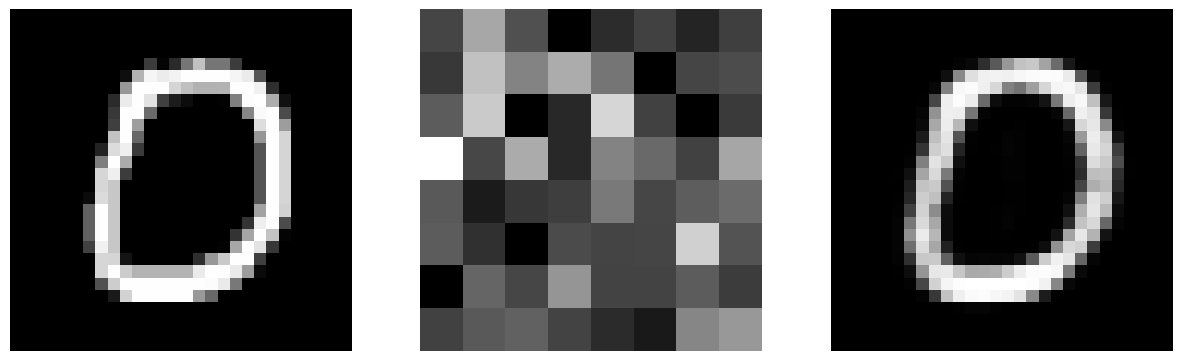

In [4]:
# 顯示單張圖片
i = 10  # 顯示幾個數字
plt.figure(figsize=(15, 5))
# 原始圖片
ax = plt.subplot(1, 3, 1)
ax.imshow(x_test[i].reshape(28, 28), cmap='gray')
ax.axis('off')
# 壓縮圖片
ax = plt.subplot(1, 3, 2)
ax.imshow(encoded_imgs[i].reshape(8, 8), cmap='gray')
ax.axis('off')
# 還原圖片
ax = plt.subplot(1, 3, 3)
ax.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
ax.axis('off')

plt.show()

1/1 [==============================] - 0s 16ms/step


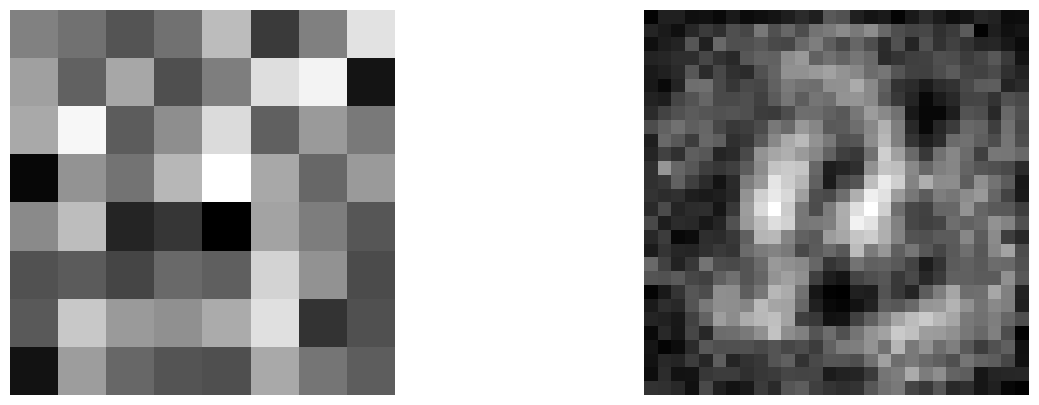

In [18]:
# test
from numpy import random

# random image
img = np.random.standard_normal([8, 8])
rand_imgs = img.reshape(1,64)

# 解壓縮圖片
decoded_imgs = decoder.predict(rand_imgs)

# 顯示單張圖片
plt.figure(figsize=(15, 5))
# 壓縮圖片
ax = plt.subplot(1, 2, 1)
ax.imshow(rand_imgs.reshape(8, 8), cmap='gray')
ax.axis('off')
# 還原圖片
ax = plt.subplot(1, 2, 2)
ax.imshow(decoded_imgs[0].reshape(28, 28), cmap='gray')
ax.axis('off')

plt.show()